In [1]:
pip install vaderSentiment


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import datetime
from datetime import date
import altair as alt
import matplotlib.pyplot as plt
import vaderSentiment.vaderSentiment
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
import ast
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from nltk.corpus import stopwords
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import pickle
import nltk
from joblib import dump, load
import warnings
import altair as alt

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Original Data only one time period

In [5]:
listings_df = pd.read_csv('/content/drive/MyDrive/Capstone/listings.csv',low_memory=False)
print(listings_df.shape)

#only looking at Austin
listings_df[listings_df['city']=='Austin']
listings_df.head()

(34015, 78)


,Unnamed: 0,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city,state
0,0,329306,https://www.airbnb.com/rooms/329306,20221215043825,2022-12-15,city scrape,"Urban Homestead, 5 minutes to downtown",Come stay in a French-country inspired house w...,The house is on a quiet street in East Austin ...,https://a0.muscache.com/pictures/b15def0c-34f3...,...,4.78,NaN,t,5,2,3,0,4.36,Austin,Texas
1,1,5456,https://www.airbnb.com/rooms/5456,20221215043825,2022-12-15,city scrape,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,...,4.79,NaN,f,1,1,0,0,3.71,Austin,Texas
2,2,331549,https://www.airbnb.com/rooms/331549,20221215043825,2022-12-15,previous scrape,One Room with Private Bathroom,<b>The space</b><br />One bedroom with private...,NaN,https://a0.muscache.com/pictures/9486602/d002b...,...,NaN,NaN,f,1,0,1,0,NaN,Austin,Texas
3,3,5769,https://www.airbnb.com/rooms/5769,20221215043825,2022-12-15,city scrape,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,...,4.92,NaN,f,1,0,1,0,1.77,Austin,Texas
4,4,333442,https://www.airbnb.com/rooms/333442,20221215043825,2022-12-15,city scrape,Rare Secluded 1940s Estate,Welcome to our RARE SECLUDED 1940s ESTATE--an ...,Tarrytown is one of the oldest and most distin...,https://a0.muscache.com/pictures/457912c4-dd6e...,...,4.78,NaN,t,1,1,0,0,1.32,Austin,Texas


In [6]:
#Dropping columns

columns_to_drop = ['Unnamed: 0', 'name','description','license','neighborhood_overview', 'amenities','scrape_id',
        'neighbourhood','calendar_updated','picture_url',  'host_url','host_thumbnail_url', 'host_picture_url',
        'host_name', 'host_verifications','host_about','host_location','neighbourhood_group_cleansed','bathrooms',
        'neighbourhood_cleansed']
listings_df =listings_df.drop(labels=columns_to_drop,axis=1)

In [7]:
#dropping nulls in certain columns
listings_df = listings_df.dropna(subset=['reviews_per_month','host_response_rate','host_acceptance_rate','host_is_superhost','review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location','beds','bedrooms',
 'review_scores_value'],axis=0)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

print(listings_df.shape)

(21889, 58)


In [8]:
#converting dates to day, month, year columns 
warnings.filterwarnings('ignore')
def convert_date(df,column):
  day_col = str(column + ' day')
  month_col = str(column + ' month')
  year_col = str(column + ' year')
  df['date'] = pd.to_datetime(df[column])
  df[day_col] = df['date'].dt.day
  df[month_col] = df['date'].dt.month
  df[year_col] = df['date'].dt.year
  df = df.drop(labels=[column,'date'],axis=1)
  return df


listings_df = convert_date(listings_df,'last_scraped')
listings_df = convert_date(listings_df,'first_review')
listings_df = convert_date(listings_df,'last_review')
listings_df = convert_date(listings_df,'calendar_last_scraped')
listings_df = convert_date(listings_df,'host_since')
print(listings_df.head())


       id                          listing_url       source  host_id  \
0  329306  https://www.airbnb.com/rooms/329306  city scrape   880571   
1    5456    https://www.airbnb.com/rooms/5456  city scrape     8028   
3    5769    https://www.airbnb.com/rooms/5769  city scrape     8186   
4  333442  https://www.airbnb.com/rooms/333442  city scrape  1698318   
6    6448    https://www.airbnb.com/rooms/6448  city scrape    14156   

   host_response_time host_response_rate host_acceptance_rate  \
0      within an hour               100%                 100%   
1  within a few hours               100%                  96%   
3      within an hour                90%                 100%   
4      within an hour               100%                 100%   
6      within an hour               100%                 100%   

  host_is_superhost host_neighbourhood  host_listings_count  ...  \
0                 f      East Downtown                  5.0  ...   
1                 t      East Downtown  

In [9]:
#Converting percents/prices/text to numbers
listings_df['host_acceptance_rate'] = listings_df['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0
listings_df['host_response_rate'] = listings_df['host_response_rate'].str.rstrip('%').astype('float') / 100.0
listings_df['price'] = listings_df['price'].apply(lambda x: x.strip('$'))
listings_df['price'] = listings_df['price'].apply(lambda x: x.replace(',',''))
listings_df['price'] = listings_df['price'].astype('float') 
listings_df['price'] = listings_df['price'].apply(lambda x:np.log(x))

listings_df['bathrooms_text'] = listings_df['bathrooms_text'].fillna(1)
listings_df['bathrooms_text'] = listings_df['bathrooms_text'].replace('Half-bath',0.5)
listings_df['bathrooms_text'] = listings_df['bathrooms_text'].replace('Private half-bath',0.5)
listings_df['bathrooms_text'] = listings_df['bathrooms_text'].replace('Shared half-bath',0.5)
listings_df['bathrooms_text'] = listings_df['bathrooms_text'].apply(lambda x:str(x).split()[0])




In [10]:
#checking all bathrooms are numbers
print(listings_df['bathrooms_text'].unique())

['1' '3' '2' '2.5' '1.5' '3.5' '4' '0' '4.5' '5' '8' '0.5' '6.5' '6' '5.5'
 '10.5' '17' '7.5' '7' '11' '12' '11.5' '9.5' '14' '9' '16' '8.5' '13.5']


In [11]:
#converting t/f to 1/0
def convert_tf(df,column):
  df[column] = df[column].replace({'t':1, 'f':0})
  return df
  

In [12]:
#getting dummy variables
def get_dummies(df,column):
  dummies = pd.get_dummies(df[column])
  dummy_names = list(dummies.columns)
  df = pd.concat([df,dummies],axis=1)
  df = df.drop(labels=[dummy_names[-1],column],axis=1)
  return df

In [13]:
#getting dummy variables
listings_df = get_dummies(listings_df,'host_response_time')
listings_df = get_dummies(listings_df,'host_neighbourhood')
listings_df = get_dummies(listings_df,'property_type')
listings_df = get_dummies(listings_df,'room_type')
listings_df = convert_tf(listings_df,'host_has_profile_pic')
listings_df = convert_tf(listings_df,'host_identity_verified')
listings_df = convert_tf(listings_df,'host_is_superhost')
listings_df = convert_tf(listings_df,'instant_bookable')
listings_df = convert_tf(listings_df,'has_availability')
listings_df = listings_df.drop(labels='listing_url',axis=1)

In [14]:
#Copying df to run first model
df1 = listings_df.copy(deep=True)
df1 = df1.drop(labels=['id','host_id','source','city','state'],axis=1)

df1.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'latitude',
       'longitude', 'accommodates',
       ...
       'Shared room in townhouse', 'Shipping container', 'Tent', 'Tiny home',
       'Tipi', 'Tower', 'Treehouse', 'Entire home/apt', 'Hotel room',
       'Private room'],
      dtype='object', length=1126)

In [15]:
y = df1['price']
df1 = df1.drop(labels=['price'],axis=1)
X = df1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)


In [16]:
#Random Forest regression

reg_rf = RandomForestRegressor(random_state=1)
reg_rf.fit(X_train, y_train)
y_pred= reg_rf.predict(X_test)

print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))


Mean squared error (MSE): 0.16
Coefficient of determination (R^2): 0.72


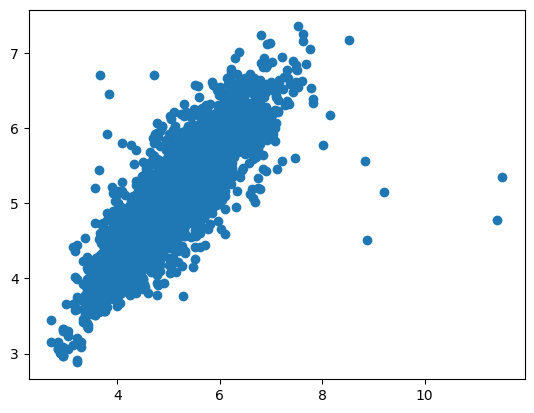

In [17]:
plt.scatter(y_test, y_pred)

     values                features
0  0.009373  number_of_reviews_l30d
1  0.009637                    beds
2  0.010185          host_since day
3  0.010362         host_since year
4  0.011834        availability_365


Text(0.5, 0, 'Random Forest Feature Importance')

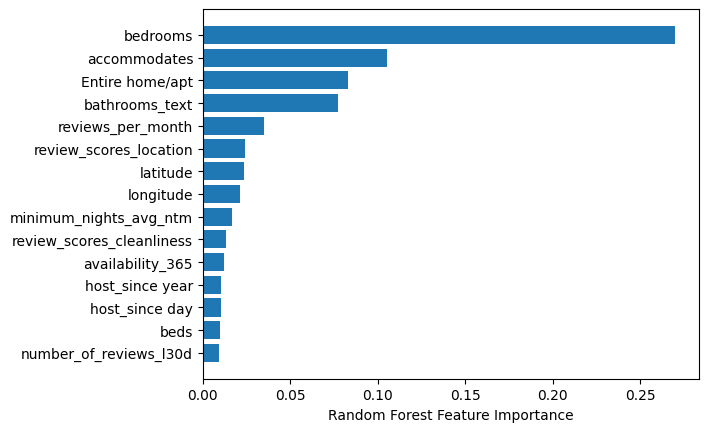

In [18]:
top_x_lst = reg_rf.feature_importances_.argsort()[-15:]
#print(top_x_lst)

features_df = pd.DataFrame(X_train.columns[top_x_lst], reg_rf.feature_importances_[top_x_lst]).reset_index()
features_df = features_df.rename(columns={'index':'values',0:'features'})
print(features_df.head())
plt.barh(X_train.columns[top_x_lst], reg_rf.feature_importances_[top_x_lst])
plt.xlabel("Random Forest Feature Importance")


# Standard model-Austin Only, No NLP

In [19]:
#import Austin data
df = pd.read_csv('/content/drive/MyDrive/Capstone/austin_listings.csv.gz')
print(df.shape)
df.head()


(61188, 75)


,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,329306,https://www.airbnb.com/rooms/329306,20221215043825,2022-12-15,"Urban Homestead, 5 minutes to downtown",Come stay in a French-country inspired house w...,The house is on a quiet street in East Austin ...,https://a0.muscache.com/pictures/b15def0c-34f3...,880571,...,4.94,4.75,4.78,NaN,t,5,2,3,0,4.36
1,1,5456,https://www.airbnb.com/rooms/5456,20221215043825,2022-12-15,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,...,4.82,4.74,4.79,NaN,f,1,1,0,0,3.71
2,2,331549,https://www.airbnb.com/rooms/331549,20221215043825,2022-12-15,One Room with Private Bathroom,<b>The space</b><br />One bedroom with private...,NaN,https://a0.muscache.com/pictures/9486602/d002b...,1690383,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
3,3,5769,https://www.airbnb.com/rooms/5769,20221215043825,2022-12-15,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,...,4.94,4.75,4.92,NaN,f,1,0,1,0,1.77
4,4,333442,https://www.airbnb.com/rooms/333442,20221215043825,2022-12-15,Rare Secluded 1940s Estate,Welcome to our RARE SECLUDED 1940s ESTATE--an ...,Tarrytown is one of the oldest and most distin...,https://a0.muscache.com/pictures/457912c4-dd6e...,1698318,...,4.97,4.91,4.78,NaN,t,1,1,0,0,1.32


In [20]:
def combine_listings_files_together(df_lst):
    dataframe_lst=[]
    for data_f in df_lst:
        df=pd.read_csv(data_f)
        if 'source' in list(df.columns):
            df=df.drop(['source'],axis=1)
            dataframe_lst.append(df)
        else:
            dataframe_lst.append(df)
    final_df=pd.concat([dataframe_lst[0], dataframe_lst[1]], axis=0)
    for data_f in dataframe_lst[2:]:
        final_df=pd.concat([final_df,data_f],axis=0)
    return final_df

df.shape

(61188, 75)

In [21]:

df = df.rename(columns={'id':'listing_id'})

print(df.shape)

(61188, 75)


In [22]:
#Dropping columns

columns_to_drop = ['Unnamed: 0', 'name','description','license','neighborhood_overview', 'amenities','scrape_id',
        'neighbourhood','calendar_updated','picture_url',  'host_url','host_thumbnail_url', 'host_picture_url',
        'host_name', 'host_verifications','host_about','host_location','neighbourhood_group_cleansed','bathrooms',
        'neighbourhood_cleansed']
df = df.drop(labels=columns_to_drop,axis=1)


In [23]:
#dropping nulls in certain columns
df = df.dropna(subset=['reviews_per_month','host_response_rate','host_acceptance_rate','host_is_superhost','review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location','beds','bedrooms',
 'review_scores_value'],axis=0)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

print(df.shape)

(35940, 55)


In [24]:
#converting dates to day, month, year columns 
warnings.filterwarnings('ignore')
def convert_date(df,column):
  day_col = str(column + ' day')
  month_col = str(column + ' month')
  year_col = str(column + ' year')
  df['date'] = pd.to_datetime(df[column])
  df[day_col] = df['date'].dt.day
  df[month_col] = df['date'].dt.month
  df[year_col] = df['date'].dt.year
  df = df.drop(labels=[column,'date'],axis=1)
  return df


df = convert_date(df,'last_scraped')
df = convert_date(df,'first_review')
df = convert_date(df,'last_review')
df = convert_date(df,'calendar_last_scraped')
df = convert_date(df,'host_since')
print(df.head())


   listing_id                          listing_url  host_id  \
0      329306  https://www.airbnb.com/rooms/329306   880571   
1        5456    https://www.airbnb.com/rooms/5456     8028   
3        5769    https://www.airbnb.com/rooms/5769     8186   
4      333442  https://www.airbnb.com/rooms/333442  1698318   
6        6448    https://www.airbnb.com/rooms/6448    14156   

   host_response_time host_response_rate host_acceptance_rate  \
0      within an hour               100%                 100%   
1  within a few hours               100%                  96%   
3      within an hour                90%                 100%   
4      within an hour               100%                 100%   
6      within an hour               100%                 100%   

  host_is_superhost host_neighbourhood  host_listings_count  \
0                 f      East Downtown                  5.0   
1                 t      East Downtown                  1.0   
3                 t  SW Williamson Co.   

In [25]:
#Converting percents/prices/text to numbers
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype('float') / 100.0
df['price'] = df['price'].apply(lambda x: x.strip('$'))
df['price'] = df['price'].apply(lambda x: x.replace(',',''))
df['price'] = df['price'].astype('float') 
df['price'] = df['price'].apply(lambda x:np.log(x))

df['bathrooms_text'] = df['bathrooms_text'].fillna(1)
df['bathrooms_text'] = df['bathrooms_text'].replace('Half-bath',0.5)
df['bathrooms_text'] = df['bathrooms_text'].replace('Private half-bath',0.5)
df['bathrooms_text'] = df['bathrooms_text'].replace('Shared half-bath',0.5)
df['bathrooms_text'] = df['bathrooms_text'].apply(lambda x:str(x).split()[0])


print(df.shape)

(35940, 65)


In [26]:
#checking all bathrooms are numbers
print(df['bathrooms_text'].unique())

['1' '3' '2' '2.5' '1.5' '3.5' '4' '0' '4.5' '5' '8' '0.5' '6.5' '6' '5.5'
 '10.5' '17' '7.5' '7' '8.5' '13' '10' '11' '9']


In [27]:
#converting t/f to 1/0
def convert_tf(df,column):
  df[column] = df[column].replace({'t':1, 'f':0})
  return df
  

In [28]:
#getting dummy variables
def get_dummies(df,column):
  dummies = pd.get_dummies(df[column])
  dummy_names = list(dummies.columns)
  df = pd.concat([df,dummies],axis=1)
  df = df.drop(labels=[dummy_names[-1],column],axis=1)
  return df

In [29]:
#getting dummy variables
df = get_dummies(df,'host_response_time')
df = get_dummies(df,'host_neighbourhood')
df = get_dummies(df,'property_type')
df = get_dummies(df,'room_type')
df = convert_tf(df,'host_has_profile_pic')
df = convert_tf(df,'host_identity_verified')
df = convert_tf(df,'host_is_superhost')
df = convert_tf(df,'instant_bookable')
df = convert_tf(df,'has_availability')
df = df.drop(labels='listing_url',axis=1)


In [30]:
df.head()

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,...,Shipping container,Tent,Tiny home,Tiny house,Tipi,Tower,Treehouse,Entire home/apt,Hotel room,Private room
0,329306,880571,1.0,1.00,0,5.0,13.0,1,1,30.27232,...,0,0,0,0,0,0,0,0,0,1
1,5456,8028,1.0,0.96,1,1.0,4.0,1,1,30.26057,...,0,0,0,0,0,0,0,1,0,0
3,5769,8186,0.9,1.00,1,1.0,4.0,1,1,30.45697,...,0,0,0,0,0,0,0,0,0,1
4,333442,1698318,1.0,1.00,1,1.0,13.0,1,1,30.31267,...,0,0,0,0,0,0,0,1,0,0
6,6448,14156,1.0,1.00,1,1.0,2.0,1,1,30.26034,...,0,0,0,0,0,0,0,1,0,0


In [31]:
#Copying df to run first model
df1 = df.copy(deep=True)
df1 = df1.drop(labels=['listing_id','host_id'],axis=1)

In [32]:
y = df1['price']
df1 = df1.drop(labels=['price'],axis=1)
X = df1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)


In [33]:
print(X_train.shape)



(26955, 964)


In [34]:
#Random Forest regression

reg_rf = RandomForestRegressor(random_state=1)
reg_rf.fit(X_train, y_train)
y_pred= reg_rf.predict(X_test)

print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))


Mean squared error (MSE): 0.12
Coefficient of determination (R^2): 0.84


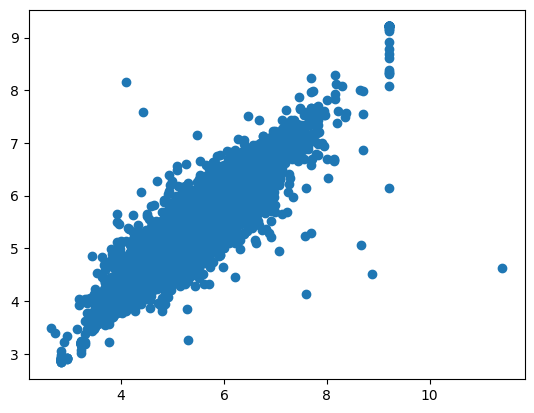

In [35]:
plt.scatter(y_test, y_pred)

     values                        features
0  0.009114             host_listings_count
1  0.009259                availability_365
2  0.010172  calculated_host_listings_count
3  0.011839          review_scores_location
4  0.015173          minimum_nights_avg_ntm


Text(0.5, 0, 'Random Forest Feature Importance')

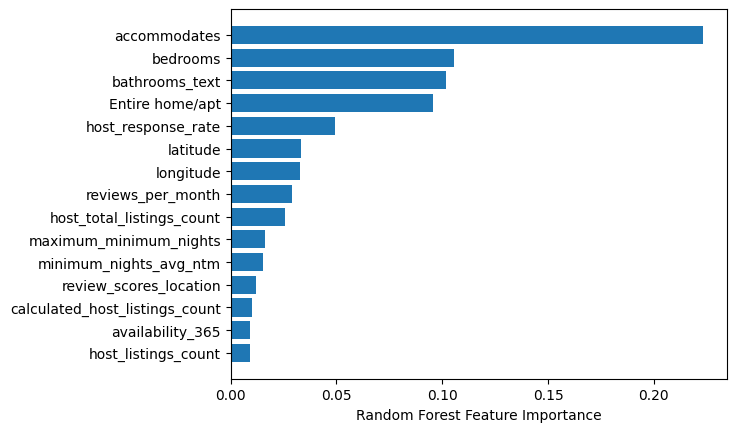

In [36]:
top_x_lst = reg_rf.feature_importances_.argsort()[-15:]
#print(top_x_lst)

features_df = pd.DataFrame(X_train.columns[top_x_lst], reg_rf.feature_importances_[top_x_lst]).reset_index()
features_df = features_df.rename(columns={'index':'values',0:'features'})
print(features_df.head())
plt.barh(X_train.columns[top_x_lst], reg_rf.feature_importances_[top_x_lst])
plt.xlabel("Random Forest Feature Importance")


# Model with sentiment only

In [37]:
#reviews for Austin
reviews_df = combine_listings_files_together(['/content/drive/MyDrive/Capstone/reviews-Austin032023.csv.gz','/content/drive/MyDrive/Capstone/reviews-Austin122022.csv.gz','/content/drive/MyDrive/Capstone/reviews-Austin092022.csv.gz','/content/drive/MyDrive/Capstone/reviews-Austin062022.csv.gz'])

reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,5456,865,2009-03-08,5267,Ellen,Sylvia is a hostess who is gracious and helpfu...
1,5456,977,2009-03-19,8102,Phil,Highly recommended. Sylvia was extremely helpf...
2,5456,1039,2009-03-22,8241,Galen,A great place to stay in a great city. Sylvia ...
3,5456,1347,2009-04-08,11152,April,Highly recommended! \r<br/>Cute and cozy guest...
4,5456,1491,2009-04-13,12400,Ivonne,"What a great little apartment! It was clean, ..."


In [38]:
#Sentiment Analysis- Austin Only

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

reviews_df['sentiment_list'] = reviews_df['comments'].apply(lambda x:sentiment.polarity_scores(str(x)))
reviews_df['compound']  = reviews_df['sentiment_list'].apply(lambda x: x['compound'])
reviews_df['vader_neg_score']  = reviews_df['sentiment_list'].apply(lambda x: x['neg'])
reviews_df['vader_neu_score']  = reviews_df['sentiment_list'].apply(lambda x: x['neu'])
reviews_df['vader_pos_score']  = reviews_df['sentiment_list'].apply(lambda x: x['pos'])
reviews_df['sentiment'] = reviews_df['compound'].apply(lambda x: 'pos' if x >=0 else 'neg')

Note that the sentiment analysis was adpated from the following source: Beri, Aditya. “Sentimental Analysis Using Vader.” Medium, Towards Data Science, 27 May 2020, https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664.

In [39]:
#Counting the positive and negative reviews for each listing
reviews_groupby = reviews_df.groupby(['listing_id','sentiment']).size().reset_index().rename(columns={0:'count'})
reviews_groupby



,listing_id,sentiment,count
0,5456,neg,8
1,5456,pos,2460
2,5769,neg,4
3,5769,pos,1077
4,6413,pos,481
...,...,...,...
23584,842941255847701981,pos,1
23585,843417270276618386,pos,1
23586,843622671951831924,pos,1
23587,843655349786359396,pos,1


In [40]:
#Fill null reviews with 0
review_counts = reviews_groupby.pivot(index='listing_id', columns='sentiment', values='count').fillna(0)

#Calculate total reviews per listing
review_counts['total_reviews'] = review_counts['neg'] + review_counts['pos']

#Calculate percentage of reviews that are positive
review_counts['perc_pos'] = round((review_counts['pos']/review_counts['total_reviews']*100),2)

#Calculate percentage of reviews that are negative
review_counts['perc_neg'] = round((100.00-review_counts['perc_pos']),2)

review_counts.head()

sentiment,neg,pos,total_reviews,perc_pos,perc_neg
listing_id,,,,,
5456,8.0,2460.0,2468.0,99.68,0.32
5769,4.0,1077.0,1081.0,99.63,0.37
6413,0.0,481.0,481.0,100.00,0.00
6448,4.0,1151.0,1155.0,99.65,0.35
8502,8.0,184.0,192.0,95.83,4.17


In [41]:
#Calculate the average vader scores for each listing
reviews_groupby_avg = reviews_df.groupby(['listing_id']).agg({'vader_pos_score':'mean','vader_neg_score':'mean','vader_neu_score':'mean','compound':'mean'})
reviews_groupby_avg

,vader_pos_score,vader_neg_score,vader_neu_score,compound
listing_id,,,,
5456,0.321008,0.007060,0.671936,0.878260
5769,0.346941,0.008181,0.644882,0.888296
6413,0.296389,0.004952,0.698692,0.885632
6448,0.338040,0.006699,0.655242,0.895230
8502,0.274854,0.011708,0.713375,0.803171
...,...,...,...,...
842941255847701981,0.269000,0.000000,0.731000,0.916600
843417270276618386,0.438000,0.000000,0.562000,0.970700
843622671951831924,0.000000,0.000000,1.000000,0.000000


In [42]:
#combine all reviews into one
reviews1 = pd.merge(review_counts,reviews_groupby_avg, on='listing_id',how='inner')
reviews1.head()


,neg,pos,total_reviews,perc_pos,perc_neg,vader_pos_score,vader_neg_score,vader_neu_score,compound
listing_id,,,,,,,,,
5456,8.0,2460.0,2468.0,99.68,0.32,0.321008,0.007060,0.671936,0.878260
5769,4.0,1077.0,1081.0,99.63,0.37,0.346941,0.008181,0.644882,0.888296
6413,0.0,481.0,481.0,100.00,0.00,0.296389,0.004952,0.698692,0.885632
6448,4.0,1151.0,1155.0,99.65,0.35,0.338040,0.006699,0.655242,0.895230
8502,8.0,184.0,192.0,95.83,4.17,0.274854,0.011708,0.713375,0.803171


In [43]:
#Combine review data and original df
review_final = pd.merge(df,reviews1, on='listing_id',how='inner')
review_final.head()



,listing_id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,...,Private room,neg,pos,total_reviews,perc_pos,perc_neg,vader_pos_score,vader_neg_score,vader_neu_score,compound
0,329306,880571,1.00,1.00,0,5.0,13.0,1,1,30.27232,...,1,24.0,2234.0,2258.0,98.94,1.06,0.330469,0.00761,0.661932,0.847223
1,329306,880571,1.00,1.00,0,5.0,13.0,1,1,30.27232,...,1,24.0,2234.0,2258.0,98.94,1.06,0.330469,0.00761,0.661932,0.847223
2,329306,880571,1.00,1.00,0,5.0,5.0,1,1,30.27232,...,1,24.0,2234.0,2258.0,98.94,1.06,0.330469,0.00761,0.661932,0.847223
3,329306,880571,0.96,1.00,0,5.0,5.0,1,1,30.27232,...,1,24.0,2234.0,2258.0,98.94,1.06,0.330469,0.00761,0.661932,0.847223
4,5456,8028,1.00,0.96,1,1.0,4.0,1,1,30.26057,...,0,8.0,2460.0,2468.0,99.68,0.32,0.321008,0.00706,0.671936,0.878260


In [44]:
#Dropping some columns, keeping only sentiment and counts, 
sent_df = review_final.drop(labels=['listing_id','host_id'],axis=1)
sent_df.head()


,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,...,Private room,neg,pos,total_reviews,perc_pos,perc_neg,vader_pos_score,vader_neg_score,vader_neu_score,compound
0,1.00,1.00,0,5.0,13.0,1,1,30.27232,-97.72579,2,...,1,24.0,2234.0,2258.0,98.94,1.06,0.330469,0.00761,0.661932,0.847223
1,1.00,1.00,0,5.0,13.0,1,1,30.27232,-97.72579,2,...,1,24.0,2234.0,2258.0,98.94,1.06,0.330469,0.00761,0.661932,0.847223
2,1.00,1.00,0,5.0,5.0,1,1,30.27232,-97.72579,2,...,1,24.0,2234.0,2258.0,98.94,1.06,0.330469,0.00761,0.661932,0.847223
3,0.96,1.00,0,5.0,5.0,1,1,30.27232,-97.72579,2,...,1,24.0,2234.0,2258.0,98.94,1.06,0.330469,0.00761,0.661932,0.847223
4,1.00,0.96,1,1.0,4.0,1,1,30.26057,-97.73441,3,...,0,8.0,2460.0,2468.0,99.68,0.32,0.321008,0.00706,0.671936,0.878260


In [45]:
y =sent_df['price']
sent_df = sent_df.drop(labels=['price'],axis=1)
X = sent_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)


In [46]:
print(X_train.shape)

(26580, 973)


In [47]:
#Random Forest regression

reg_rf = RandomForestRegressor(random_state=1)
reg_rf.fit(X_train, y_train)
y_pred= reg_rf.predict(X_test)

print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Mean squared error (MSE): 0.11
Coefficient of determination (R^2): 0.85


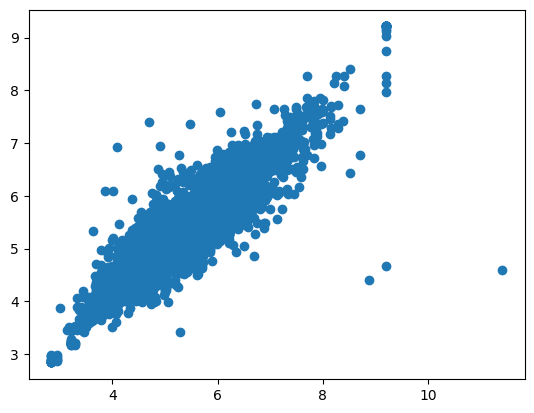

In [48]:
plt.scatter(y_test, y_pred)

     values                                     features
0  0.009127                             availability_365
1  0.009201                          host_listings_count
2  0.010162  calculated_host_listings_count_entire_homes
3  0.012408                       maximum_minimum_nights
4  0.015652                    host_total_listings_count


Text(0.5, 0, 'Random Forest Feature Importance')

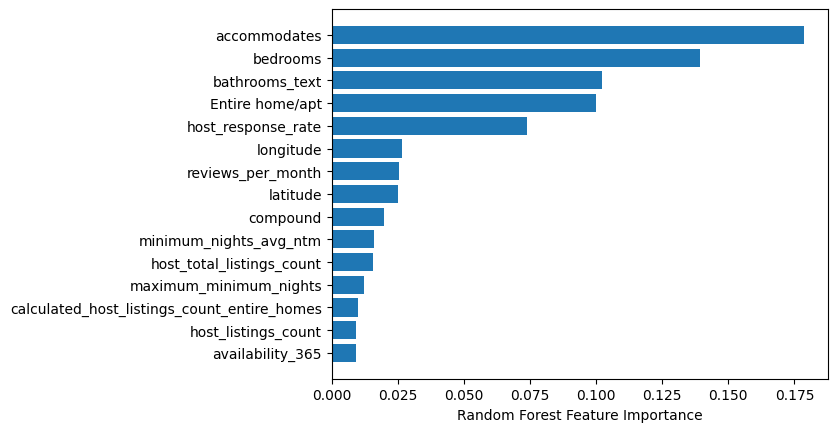

In [49]:
top_x_lst = reg_rf.feature_importances_.argsort()[-15:]
#print(top_x_lst)

features_df = pd.DataFrame(X_train.columns[top_x_lst], reg_rf.feature_importances_[top_x_lst]).reset_index()
features_df = features_df.rename(columns={'index':'values',0:'features'})
print(features_df.head())
plt.barh(X_train.columns[top_x_lst], reg_rf.feature_importances_[top_x_lst])
plt.xlabel("Random Forest Feature Importance")